<a href="https://colab.research.google.com/github/Ilapuramkruthikasaisree/Ilapuramkruthikasaisree-AscendixInternship_Task-4/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [7]:
# Fetch historical stock data
df = yf.download("AAPL", start="2015-01-01", end="2024-12-31")

# Use relevant features
data = df[['Open', 'High', 'Low', 'Close', 'Volume']]
data.dropna(inplace=True)

# Normalize features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Sequence settings
sequence_len = 60
forecast_horizon = 30

X = []
y = []

for i in range(sequence_len, len(scaled_data) - forecast_horizon):
    X.append(scaled_data[i-sequence_len:i])
    y.append(scaled_data[i:i+forecast_horizon, 3])  # predicting Close price

X = np.array(X)
y = np.array(y)


[*********************100%***********************]  1 of 1 completed


In [8]:
# 80% training, 20% testing
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [9]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(forecast_horizon))  # 30-day prediction output

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          17,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │           1,950 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,894 (206.62 KB)

 Trainable params: 52,894 (206.62 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint]
)


Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 0.0320 - val_loss: 0.0167
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0044 - val_loss: 0.0146
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0032 - val_loss: 0.0147
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - loss: 0.0029 - val_loss: 0.0049
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 0.0026 - val_loss: 0.0078
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0021 - val_loss: 0.0082
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0019 - val_loss: 0.0054
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0019 - val_loss: 0.0093
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0017 - val_loss: 0.0067
Epoch 11/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.0017 - val_loss: 0.0056


In [11]:
# Load best model weights
model.load_weights("best_model.keras")

# Predict on test set
y_pred = model.predict(X_test)

# Inverse transform predictions
# Add dummy cols to match original scaling shape
def inverse_scale(preds):
    dummy = np.zeros((preds.shape[0], data.shape[1]))
    dummy[:, 3] = preds[:, 0]  # First day of forecast
    return scaler.inverse_transform(dummy)[:, 3]

actual = inverse_scale(y_test)
predicted = inverse_scale(y_pred)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step


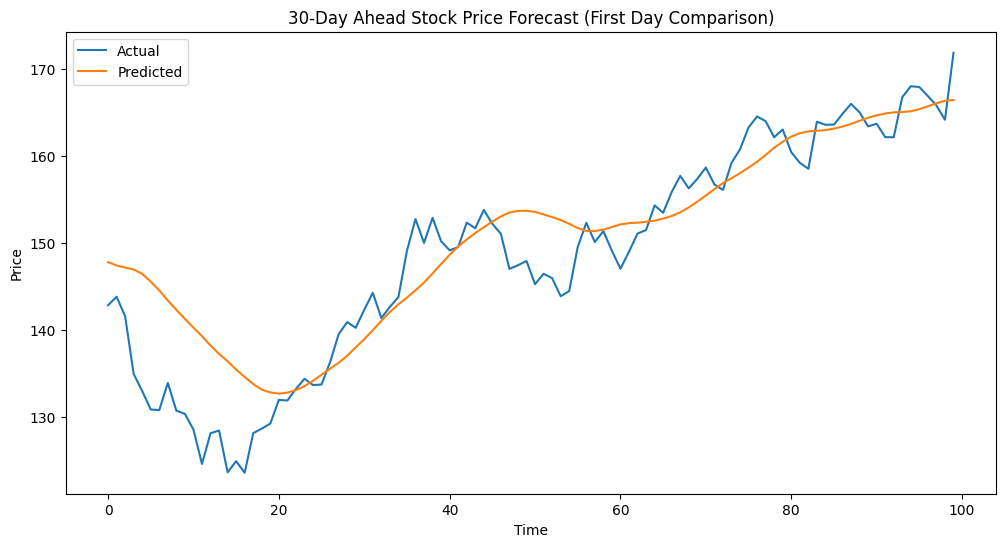

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(actual[:100], label="Actual")
plt.plot(predicted[:100], label="Predicted")
plt.title("30-Day Ahead Stock Price Forecast (First Day Comparison)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
